In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
data_train = fetch_20newsgroups(subset="train")

data_test = fetch_20newsgroups(subset="test")

In [5]:
class2name = data_train.target_names 

print(class2name)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
X_train = data_train['data']
y_train = data_train['target']


X_test = data_test['data']
y_test = data_test['target']

In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

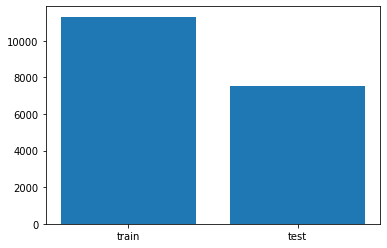

In [8]:
x = ("train", "test")
y = (len(X_train), len(X_test))

plt.bar(x, y)

In [9]:
explore_index = 5

In [10]:
#Explore target vector
print(y_train[explore_index])
print(X_train[explore_index])

16
From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagr

In [11]:
from collections import Counter

In [14]:
def explore_y(y):
    freq_classes = Counter(y)
    print(freq_classes)
    
    x = [class2name[i] for i in freq_classes.keys()]
    y = list(freq_classes.values())

    plt.bar(x, y)
    plt.xticks(rotation=90)


# Exploring train data - labels

Counter({10: 600, 15: 599, 8: 598, 9: 597, 11: 595, 7: 594, 13: 594, 14: 593, 5: 593, 2: 591, 12: 591, 3: 590, 6: 585, 1: 584, 4: 578, 17: 564, 16: 546, 0: 480, 18: 465, 19: 377})


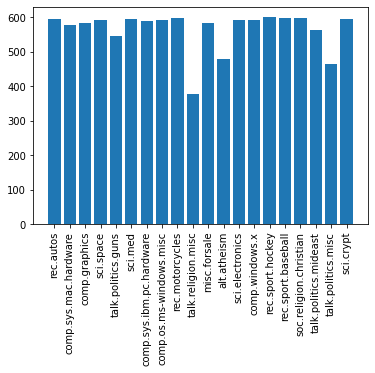

In [15]:
explore_y(y_train)

# Exploring test data - labels

Counter({10: 600, 15: 599, 8: 598, 9: 597, 11: 595, 7: 594, 13: 594, 14: 593, 5: 593, 2: 591, 12: 591, 3: 590, 6: 585, 1: 584, 4: 578, 17: 564, 16: 546, 0: 480, 18: 465, 19: 377})


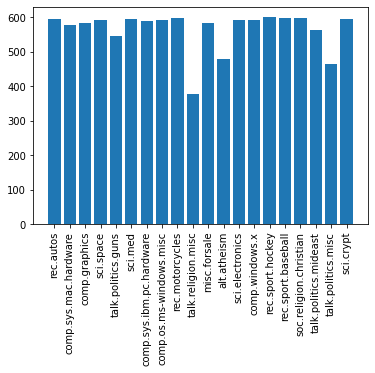

In [16]:
explore_y(y_test)

It is nice to have data in format which can be simple accessible -> convert to DataFrame.

In [17]:
import pandas as pd

In [54]:
def tranform_to_df(x, y):
    return pd.DataFrame({"text": x, "label": y})

In [55]:
train_df = tranform_to_df(X_train, y_train)
test_df = tranform_to_df(X_test, y_test)

In [56]:
train_df.head()

text  label
0  From: lerxst@wam.umd.edu (where's my thing)\nS...      7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...      4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...      4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...      1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...     14

In [57]:
test_df.head()

text  label
0  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...      7
1  From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...      5
2  From: mathew <mathew@mantis.co.uk>\nSubject: R...      0
3  From: bakken@cs.arizona.edu (Dave Bakken)\nSub...     17
4  From: livesey@solntze.wpd.sgi.com (Jon Livesey...     19

In [106]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import string
from itertools import chain

In [76]:
tokenizer = Tokenizer()

In [86]:
texts = train_df['text'].values

In [128]:
counter_len = 5
tokenized = [t.split(" ") for t in texts[:counter_len]]
tokenized_corpus = list(chain(*tokenized))
freq = Counter(tokenized_corpus)


MOST_COMMON = 10


common = freq.most_common(MOST_COMMON) 

x, y = zip(*common)

x





('the', '', 'a', 'is', 'of', 'to', 'in', 'and', 'if', 'that')

In [82]:
tokenizer.fit_on_texts(X_train['data'])

In [84]:
word_index = tokenizer.word_index

In [85]:
print(word_index)

{'the': 1, 'to': 2, 'of': 3, 'a': 4, "'ax": 5, 'and': 6, 'in': 7, 'i': 8, 'is': 9, 'that': 10, 'it': 11, 'for': 12, 'you': 13, 'from': 14, 'edu': 15, 'on': 16, 'this': 17, 'be': 18, 'are': 19, 'not': 20, 'have': 21, 'with': 22, 'as': 23, '1': 24, 'or': 25, 'was': 26, 'if': 27, 'but': 28, 'subject': 29, 'they': 30, 'com': 31, 'lines': 32, 'at': 33, 'organization': 34, 'by': 35, '2': 36, 'an': 37, 'my': 38, 'can': 39, 'x': 40, '3': 41, 'what': 42, '0': 43, 'all': 44, 'will': 45, 'm': 46, 'there': 47, 'would': 48, 'one': 49, 'do': 50, "'": 51, 'about': 52, 're': 53, 'we': 54, 'writes': 55, 'so': 56, 'he': 57, 'your': 58, 'no': 59, 'has': 60, 'article': 61, 'any': 62, 'me': 63, 'some': 64, 'who': 65, 'out': 66, 'which': 67, '4': 68, 'q': 69, 'more': 70, 'like': 71, 'people': 72, "don't": 73, 'when': 74, '5': 75, 'just': 76, 'university': 77, 'posting': 78, 'their': 79, 'were': 80, 'up': 81, 'r': 82, 'p': 83, 'w': 84, 'how': 85, 'other': 86, '7': 87, 'know': 88, 's': 89, 'only': 90, 'host':

In [72]:
def preprocess_newsgroup(text):
#     print(text)
    text = text.lower()
    text = re.sub(r"""\w*\d\w*""", ' ', text)
    text = re.sub(string.punctuation, ' ', text)
    
    return text

In [73]:
text_preprocess = train_df['text'].values[0]
print(text_preprocess)
text_preprocess = preprocess_newsgroup(text_preprocess)
print(text_preprocess)


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







error: multiple repeat at position 10

In [60]:
val = train_df['text'].values
train_df['text'] = list(map(preprocess_newsgroup, val))

In [61]:
train_df.head()

text  label
0  From: lerxst@wam.umd.edu (where's my thing)\nS...      7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...      4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...      4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...      1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...     14